# Processamento Digital de Imagens - AP1

## Parte II - Prática

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q6
Apresente o código que utiliza exclusivamente `numpy` e gera a imagem $100\times 100$ `q1.png`.

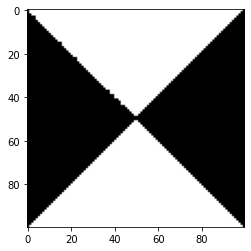

In [49]:
def q1 (n=100):

    # START CODE HERE
  # img = np.zeros((n, n))
  # x, y = np.meshgrid(np.arange(n), np.arange(n))
  # img = img - gradient
  # x_centered = abs(x - int(n/2))
  # y_centered = abs(y - int(n/2))
  # distance = np.sqrt(x_centered**2 + y_centered**2)
  # sigma = 30
  # gradient = np.exp(-(distance**2) / (2 * sigma**2))
  # return img

  x = np.linspace(-1, 1, n)
  y = np.linspace(-1, 1, n)
  X, Y = np.meshgrid(x, y)
  Z = X**2 - Y**2
  normalized_Z = np.interp(Z, (Z.min(), Z.max()), (0, 1))
  black_and_white_image = np.where(normalized_Z > 0.5, 255, 0)
  black_and_white_image = np.rot90(black_and_white_image)
  return black_and_white_image
  # return black_and_white_image
    # END CODE HERE

img = q1()
plt.imshow(img, cmap='gray')
plt.show()


### Q7
A Entropia de um array é dada por
$
H = - \sum_{i=0}^{L} p_{i} \log p_{i}
$
onde
$
p_{i} = \dfrac{n_{i}}{n}
$
e $n_{i}$ é a quantidade de pixels que possuem intensidade $i$, $i=0,\ldots,L$ e $n$ é o número total de pixels na imagem. O logaritmo é na base 2.
1. Calcule as entropias das imagens `q2a.png` e `q2b.png` utilizando **exclusivamente** `numpy`.
1. Compare os dois resultados e explique o que pode justificar a diferença entre eles.

Entropy q1a: 1.00
Entropy q1b: 1.00


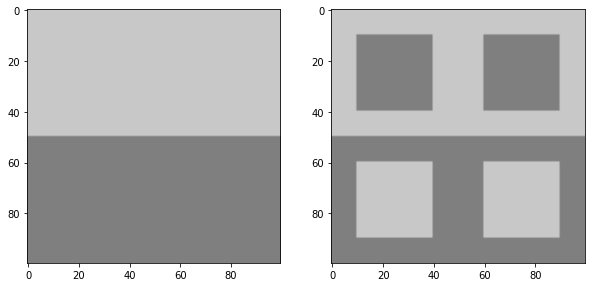

In [10]:
q1a = cv2.imread('q1a.png', cv2.IMREAD_GRAYSCALE)
q1b = cv2.imread('q1b.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(q1a, vmin=0, vmax=255, cmap='gray')
plt.subplot(122), plt.imshow(q1b, vmin=0, vmax=255, cmap='gray')

def entropy(img):
    
    ### START CODE HERE
  counts = np.bincount(img.flatten())
  probs = counts / np.sum(counts)
  probs = probs[probs != 0]
  H = -np.sum(probs * np.log2(probs))
  return H
    ### END CODE HERE

# Testando sua resposta
entropy_q1a = entropy(q1a)
entropy_q1b = entropy(q1b)

print(f'Entropy q1a: {entropy_q1a:.2f}')
print(f'Entropy q1b: {entropy_q1b:.2f}')


### Q8
Aplique uma transformação que melhore a visualização da imagem `aerial.tif` para que seja alcançado um resultado similar à imagem `dst.png`.

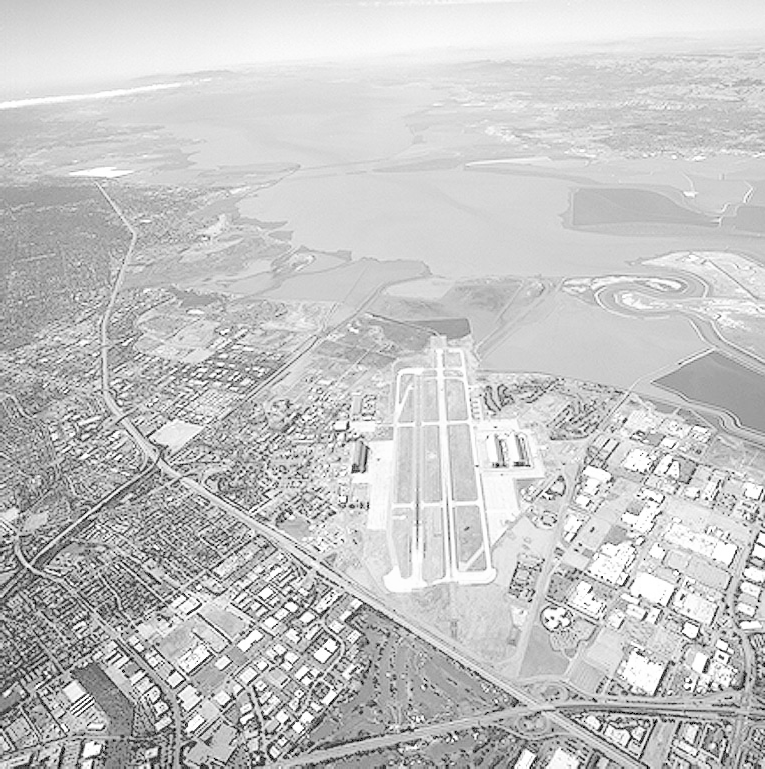

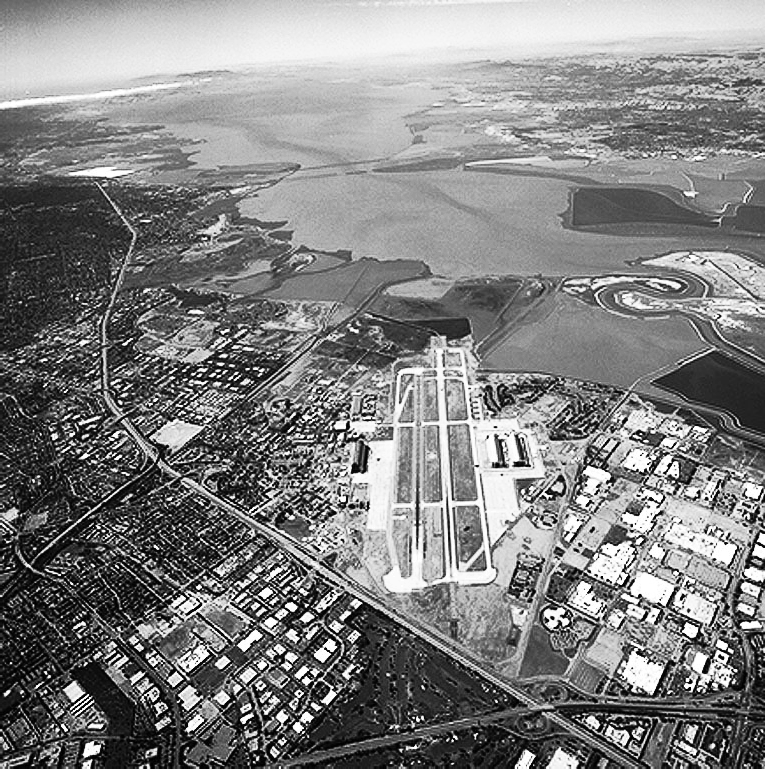

In [16]:
src = cv2.imread('aerial.tif', cv2.IMREAD_GRAYSCALE)

def melhora_visualizacao(src):
    
    ### START CODE HERE
  img_eq = cv2.equalizeHist(src)
  return img_eq
    ### END CODE HERE


dst = melhora_visualizacao(src)

# cv2.imwrite('dst.png', dst) Função comentada pela limitação do ambiente colab

# plt.figure(figsize=(10,5))
# plt.subplot(121), plt.imshow(src, cmap='gray')
# plt.subplot(122), plt.imshow(dst, cmap='gray')
# plt.show()


from google.colab.patches import cv2_imshow
cv2_imshow(src)
cv2_imshow(dst)
